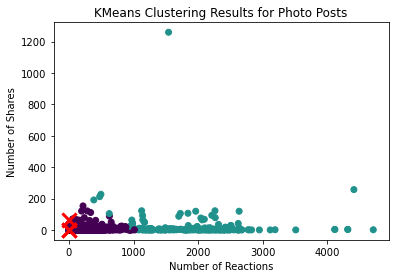

photo_mean:

 num_reactions    181.290345
num_comments      15.993470
num_shares         2.553871
dtype: float64

photo_std:

 num_reactions    443.506816
num_comments     162.312405
num_shares        22.238363
dtype: float64
Silhouette score: 0.9049501420804313


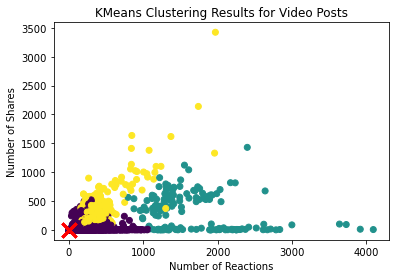


video_mean:

 num_reactions    283.409597
num_comments     642.478149
num_shares       115.679949
dtype: float64

video_std:

 num_reactions     446.605370
num_comments     1442.202386
num_shares        206.980639
dtype: float64
Silhouette score: 0.6422471549909706

Observem una primera pista sobre quines diferències en característiques presenten, a partir del clustering i les mitjanes i desviacions estàndard entre interaccions de publicacions de fotos i videos.


In [70]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score


# Load the data from CSV file
df = pd.read_csv("Publicacions Facebook Thailandia.csv", sep=",")

# Calculate mean and standard deviation for each column based on video_or_photo
photo_df = df[df['status_type'] == 'photo'][["num_reactions", "num_comments", "num_shares"]]
photo_mean = photo_df.mean()
photo_std = photo_df.std()


video_df = df[df['status_type'] == 'video'][["num_reactions", "num_comments", "num_shares"]]
video_mean = video_df.mean()
video_std = video_df.std()

# Create the KMeans models with k=3
photo_kmeans = KMeans(n_clusters=3)
video_kmeans = KMeans(n_clusters=3)

# Fit the models to the data
photo_kmeans.fit((photo_df - photo_mean) / photo_std)
video_kmeans.fit((video_df - video_mean) / video_std)

# Get the centroids and labels
photo_centroids = photo_kmeans.cluster_centers_
photo_labels = photo_kmeans.labels_

video_centroids = video_kmeans.cluster_centers_
video_labels = video_kmeans.labels_

# Plot the data points and centroids for photo posts
plt.scatter(photo_df["num_reactions"], photo_df["num_shares"], c=photo_labels)
plt.scatter(photo_centroids[:, 0], photo_centroids[:, 1], marker="x", s=200, linewidths=3, color="r")
plt.xlabel("Number of Reactions")
plt.ylabel("Number of Shares")
plt.title("KMeans Clustering Results for Photo Posts")
plt.show()
print("photo_mean:\n\n",photo_mean)
print("\nphoto_std:\n\n",photo_std)

# calcular el silhouette score per al clustering k-means amb k=3
silhouette_avg = silhouette_score(photo_df, photo_labels)

print("Silhouette score:", silhouette_avg)

# Plot the data points and centroids for video posts
plt.scatter(video_df["num_reactions"], video_df["num_shares"], c=video_labels)
plt.scatter(video_centroids[:, 0], video_centroids[:, 1], marker="x", s=200, linewidths=3, color="r")
plt.xlabel("Number of Reactions")
plt.ylabel("Number of Shares")
plt.title("KMeans Clustering Results for Video Posts")
plt.show()
print("\nvideo_mean:\n\n",video_mean)
print("\nvideo_std:\n\n",video_std)

# calcular el silhouette score per al clustering k-means amb k=3
silhouette_avg = silhouette_score(video_df, video_labels)

print("Silhouette score:", silhouette_avg)
print("\nObservem una primera pista sobre quines diferències en característiques presenten, a partir del clustering i les mitjanes i desviacions estàndard entre interaccions de publicacions de fotos i videos.")

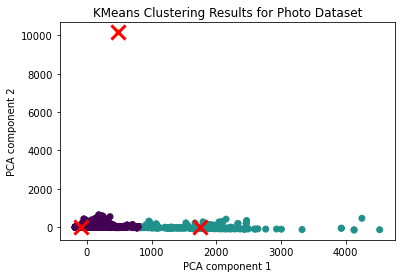

Silhouette score: 0.9082958791562724

Observem que no ens faltaria un tercer cluster pel dataset de les publicacions en fotos, ja que tenim una variació 
suficientment clara.


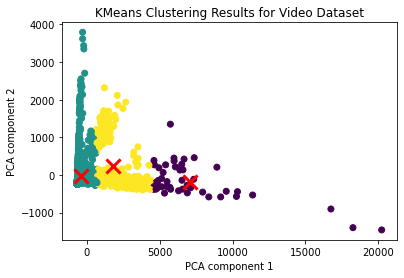

Silhouette score: 0.7014957590923745


In [65]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the data from CSV file
df = pd.read_csv("Publicacions Facebook Thailandia.csv", sep=",")
df_photos = df[df["status_type"] == "photo"]
df_videos = df[df["status_type"] == "video"]

# Select the columns to be used for clustering
columns = ["num_reactions", "num_comments", "num_shares"]
df_photos = df_photos[columns]
df_videos = df_videos[columns]

# Apply PCA to the photo dataset
pca = PCA(n_components=2)
df_photos_pca = pca.fit_transform(df_photos)

# Create the KMeans model with k=3 for photo dataset
kmeans = KMeans(n_clusters=3)
kmeans.fit(df_photos_pca)

# Get the centroids and labels
centroids = kmeans.cluster_centers_
photo_labels = kmeans.labels_

# Plot the data points and centroids for photo dataset
plt.scatter(df_photos_pca[:, 0], df_photos_pca[:, 1], c=photo_labels)
plt.scatter(centroids[:, 0], centroids[:, 1], marker="x", s=200, linewidths=3, color="r")
plt.xlabel("PCA component 1")
plt.ylabel("PCA component 2")
plt.title("KMeans Clustering Results for Photo Dataset")
plt.show()

# calcular el silhouette score per al clustering k-means amb k=3
silhouette_avg = silhouette_score(df_photos_pca, photo_labels)

print("Silhouette score:", silhouette_avg)
print("\nObservem que no ens faltaria un tercer cluster pel dataset de les publicacions en fotos, ja que tenim una variació \nsuficientment clara.")

# Apply PCA to the video dataset
pca = PCA(n_components=2)
df_videos_pca = pca.fit_transform(df_videos)

# Create the KMeans model with k=3 for video dataset
kmeans = KMeans(n_clusters=3)
kmeans.fit(df_videos_pca)

# Get the centroids and labels
centroids = kmeans.cluster_centers_
video_labels = kmeans.labels_

# Plot the data points and centroids for video dataset
plt.scatter(df_videos_pca[:, 0], df_videos_pca[:, 1], c=video_labels)
plt.scatter(centroids[:, 0], centroids[:, 1], marker="x", s=200, linewidths=3, color="r")
plt.xlabel("PCA component 1")
plt.ylabel("PCA component 2")
plt.title("KMeans Clustering Results for Video Dataset")
plt.show()

# calcular el silhouette score per al clustering k-means amb k=3
silhouette_avg = silhouette_score(df_videos_pca, video_labels)

print("Silhouette score:", silhouette_avg)

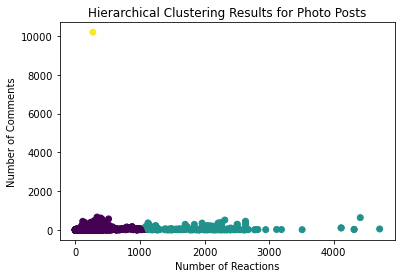

Silhouette score for photo posts: 0.9083397098715505


In [66]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Load the data from CSV file
df = pd.read_csv("Publicacions Facebook Thailandia.csv", sep=",")
df_photo = df.loc[df['status_type'] == 'photo']

# Select the columns to be used for clustering
df_photo = df_photo[["num_reactions", "num_comments", "num_shares"]]

# Perform hierarchical clustering with k=3
agg_clustering_photo = AgglomerativeClustering(n_clusters=3)
agg_clustering_photo.fit(df_photo)

# Get the cluster labels for each data point
labels_photo = agg_clustering_photo.labels_

# Visualize the clustering results using a scatter plot
plt.scatter(df_photo.iloc[:, 0], df_photo.iloc[:, 1], c=labels_photo)
plt.xlabel("Number of Reactions")
plt.ylabel("Number of Comments")
plt.title("Hierarchical Clustering Results for Photo Posts")
plt.show()

from sklearn.metrics import silhouette_score

# calcular el silhouette score per al clustering k-means amb k=3
silhouette_avg = silhouette_score(df_photo, labels_photo)

print("Silhouette score for photo posts:", silhouette_avg)


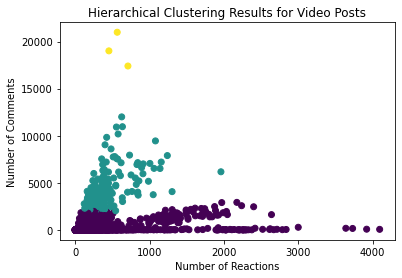

Silhouette score for video posts: 0.7935457793680594 (abans de categoritzar-lo amb el jeràrquic teniem uns: 0.7)

Veiem que tenim un Silhouette score més alt amb l'algorisme jeràrquic que abans, ja que les dades del video no presenten agrupacions clarament definides. 
Això també ens permet veure que obtenim una gran variació entre interaccions de les publiacions, en canvi, en les publicacions amb fotos, tenim una variació més clara i de menys magnitud.

Podríem, per tant, extraure una conclusió general on les publicacions amb video tendeixen a rendir millors interaccions (siguin en comentaris, reaccions, etc.) i amb variabilitat. En canvi, les publiacions amb fotos, tendeixen a tenir unes interaccions més específiques (sense molts comentaris) i també amb un nombre menys gran de interaccions. 


In [72]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Load the data from CSV file
df = pd.read_csv("Publicacions Facebook Thailandia.csv", sep=",")
df_video = df.loc[df['status_type'] == 'video']

# Select the columns to be used for clustering
df_video = df_video[["num_reactions", "num_comments", "num_shares"]]

# Perform hierarchical clustering with k=3
agg_clustering_video = AgglomerativeClustering(n_clusters=3)
agg_clustering_video.fit(df_video)

# Get the cluster labels for each data point
labels_video = agg_clustering_video.labels_

# Visualize the clustering results using a scatter plot
plt.scatter(df_video.iloc[:, 0], df_video.iloc[:, 1], c=labels_video)
plt.xlabel("Number of Reactions")
plt.ylabel("Number of Comments")
plt.title("Hierarchical Clustering Results for Video Posts")
plt.show()

# calculate the silhouette score for the clustering
silhouette_avg = silhouette_score(df_video, labels_video)

print("Silhouette score for video posts:", silhouette_avg, "(abans de categoritzar-lo amb el jeràrquic teniem uns: 0.7)\n")
print("Veiem que tenim un Silhouette score més alt amb l'algorisme jeràrquic que abans, ja que les dades del video no presenten agrupacions clarament definides. \nAixò també ens permet veure que obtenim una gran variació entre interaccions de les publiacions, en canvi, en les publicacions amb fotos, tenim una variació més clara i de menys magnitud.")
print("\nPodríem, per tant, extraure una conclusió general on les publicacions amb video tendeixen a rendir millors interaccions (siguin en comentaris, reaccions, etc.) i amb variabilitat. En canvi, les publiacions amb fotos, tendeixen a tenir unes interaccions més específiques (sense molts comentaris) i també amb un nombre menys gran de interaccions. ")